In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [60]:
class Player():
        """ Class that construct the player board for the battleship
        Game.
        
        Parameters
        ------------------------------------------
        N(int): Size of the board.
        
        """
        def __init__(self, N):
            self.N = N
            self.Board_player = np.zeros((N,N))
            self.Board_Opponent = np.zeros((N,N))
            
            
        def Place_Destroyer(self, X=None, Y=None, Position=None):
            """Function to put the Boat of type Destroyer.
            
            """
            if X == None:
                Boat_1_x = input("Position of the Destroyer on the X axis: ")
            else: 
                Boat_1_x = X
            if Y == None:
                Boat_1_y = input("Position of the Destroyer on the Y axis: ")
            else:
                Boat_1_y = Y
            if Position == None:                
                Boat_Pos = input("Which position do you want to place(up, down, left or right): ")
            else:
                Boat_Pos = Position
            self.Board_player[int(Boat_1_x),int(Boat_1_y)] = 1
            if Boat_Pos == "up":
                self.Board_player[int(Boat_1_x),int(Boat_1_y)-1] = 1
            if Boat_Pos == "down":
                self.Board_player[int(Boat_1_x)%self.N,(int(Boat_1_y)+1)%self.N] = 1
            if Boat_Pos == "left":
                self.Board_player[int(Boat_1_x)-1,int(Boat_1_y)] = 1
            if Boat_Pos == "right":
                self.Board_player[(int(Boat_1_x)+1)%self.N,int(Boat_1_y)] = 1
            
        def Place_Submarine(self,X=None,Y=None, Position=None):
            """Function to put the Boat of type Submarine.
            
            """
            if X == None:
                Boat_1_x = input("Position of the Destroyer on the X axis: ")
            else: 
                Boat_1_x = X
            if Y == None:
                Boat_1_y = input("Position of the Destroyer on the Y axis: ")
            else:
                Boat_1_y = Y
            if Position == None:                
                Boat_Pos = input("Which position do you want to place(up, down, left or right): ")
            else:
                Boat_Pos = Position
            self.Board_player[int(Boat_1_x),int(Boat_1_y)] = 1
            if Boat_Pos == "up":
                self.Board_player[int(Boat_1_x),int(Boat_1_y)-1] = 1
                self.Board_player[int(Boat_1_x),int(Boat_1_y)-2] = 1
            if Boat_Pos == "down":
                self.Board_player[int(Boat_1_x),(int(Boat_1_y)+1)%self.N] = 1
                self.Board_player[int(Boat_1_x),(int(Boat_1_y)+2)%self.N] = 1
            if Boat_Pos == "left":
                self.Board_player[int(Boat_1_x)-1,int(Boat_1_y)] = 1
                self.Board_player[int(Boat_1_x)-2,int(Boat_1_y)] = 1
            if Boat_Pos == "right":
                self.Board_player[(int(Boat_1_x)+1)%self.N,int(Boat_1_y)] = 1
                self.Board_player[(int(Boat_1_x)+2)%self.N,int(Boat_1_y)] = 1
        
        def Outofbounds(self,X,Y):
            """Check if it is out of bounds.
            
            Parameters
            ------------------------------------------
            X(int): Position X.
            Y(int): Position X.
            """
            
            if X < 0 or X > self.N-1 or Y < 0 or Y > self.N-1:
                return False
            else:
                return True
            
        def Visualization_Player_Board(self):
            """Function to show player board.
            
            """
            plt.xticks(range(self.N))
            plt.yticks(range(self.N))
            plt.imshow(self.Board_player)
            plt.show()
            
        def Visualization_Opponent_Board(self):
            """Function to show Opponent board.
            
            """
            plt.xticks(range(self.N))
            plt.yticks(range(self.N))
            plt.imshow(self.Board_Opponent)
            plt.show()
            
        def Place_All(self):
            """Place all your boats.
            """
            print("Place Destroyer")
            self.Place_Destroyer()
            print("Place Submarine")
            self.Place_Submarine()
            
            

In [65]:
class Computer_Player(Player):
    def __init__(self, N):
        super().__init__(N)
        
    def Random_X_Y(self):
        """Function to choose a place to attack randomly.
        """
        return np.random.randint(0,self.N,size = (2,))
    
    def Place_all_random(self):
        """Function that place all boats randomly.
        """
        pos = ['up','down','left','right']
        
        self.Place_Destroyer(*self.Random_X_Y(),np.random.choice(pos))
        
        self.Place_Submarine(*self.Random_X_Y(),np.random.choice(pos))
            

In [84]:
class Game():
    """ Class that construct the Game. Choose if you want to play with another
    Player.
    
    """
    
    def __init__(self, Single_Player=True):
        self.N = 10
        self.Player_1 = Player(N=self.N)
        self.SP = Single_Player
        if self.SP:
            self.Player_2 = Computer_Player(N=self.N)
        else:
            self.Player_2 = Player(N=self.N)
        self.End = False
        
    def Hit_Opponent(self, Attacker, Defender,X=None,Y=None):
        """Function to define an attack on the
        Opponent Board.
        
        Parameters
        -------------------------------------
        Attacker: Player that attacked.
        Defender: Player that is Defending.
        """
        if X == None:
            Hit_x = int(input("Position of the attack on the X axis: "))
        else:
            Hit_x = X
        if Y == None:            
            Hit_y = int(input("Position of the attack on the Y axis: "))
        else:
            Hit_y = Y
            
        while Hit_x < 0 or Hit_x > self.N-1 or Hit_y < 0 or Hit_y > self.N-1 :
            print("Invalid input, try again")
            Hit_x = int(input("Position of the attack on the X axis: "))
            Hit_y = int(input("Position of the attack on the Y axis: "))
        
        if Defender.Board_player[int(Hit_x),int(Hit_y)] == 1:
            print("\n Hit")
            Defender.Board_player[int(Hit_x),int(Hit_y)] = 2
            Attacker.Board_Opponent[int(Hit_x),int(Hit_y)] = 2
        
        elif Defender.Board_player[int(Hit_x),int(Hit_y)] == 0:
            print("\n Miss")
            Attacker.Board_Opponent[int(Hit_x),int(Hit_y)] = 1
        
        else:
            print("\n You already attacked here. Try Again")
            self.Hit_Opponent(Attacker, Defender)
    
    def Win_Condition(self):
        """Function to check if the game has ended.
        """
        A = (self.Player_1.Board_player == 1)
        B = (self.Player_2.Board_player == 1)
        if not A.any():
            print("Player 2 Wins!")
            self.End = True
        
        elif not B.any():
            print("Player 1 Wins!")
            self.End = True
            
    def Main_Loop(self):
        """Main loop of the game.
        """
        print("Game Started")
        print("Player 1 place your boat")
        self.Player_1.Place_All()
        clear_output()
        if self.SP:
            self.Player_2.Place_all_random()
        else:
            print("Player 2 place your boat")
            self.Player_2.Place_All()
            clear_output()
        
        while not self.End:

            print("Player 1 Turn")
            print("Here is where you attacked")
            self.Player_1.Visualization_Opponent_Board()
            self.Hit_Opponent(self.Player_1, self.Player_2)
            clear_output()
            if self.SP:                
                self.Hit_Opponent(self.Player_2, self.Player_1, *self.Player_2.Random_X_Y())
                print("Computer Turn")
                self.Player_2.Visualization_Opponent_Board()
            else:
                print("Player 2 Turn")
                print("Here is where you attacked")
                self.Player_2.Visualization_Opponent_Board()
                self.Hit_Opponent(self.Player_2, self.Player_1)
                clear_output()
                
            self.Win_Condition()

In [85]:
def Battleship():
    """Function to run Battleship Game.
    """
    
    G = Game()
    G.Main_Loop()


 Miss
Computer Turn


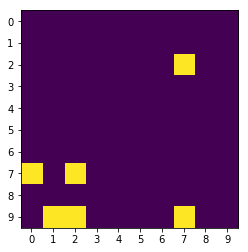

Player 1 Turn
Here is where you attacked


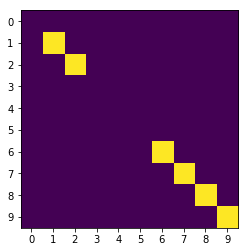

KeyboardInterrupt: 

In [86]:
Battleship()